In [2]:
!python3.11 -m pip install numpy pandas matplotlib


[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: pip3 install --upgrade pip


# Artificial Intelligence
## UEMH3073 / UECS2053 / UECS2153

# Lab 2: Genetic Algorithm

This notebook is an assignment requiring you to investigate the Travelling Salesman Problem. Guidance is provided so you can understand what needs to be done for this assignment as you follow through this lab. Convenience classes and functions/ methods are provided.

You will encounter #TODO in the code cells explaining tasks you need to complete. In other words, you will need to write codes and accomplish the #TODO tasks so that the genetic algorithm functions well and runs correctly. Look for "Replacement starts here" and "Replacement ends here" to know the parts of the codes requiring your inputs.
    

The #TODO tasks and their marks distribution are as follows:
 
a. #TODO1 (10 marks) in the Population Initialization function. You will read a set of cities from the filename when creating an initial population. 

b. #TODO2 (10 marks) in the Parent Selection function. You will replace a dummy parent selection function with Tournament Selection. 

c. #TODO3 (10 marks) in the Parent Selection function. You will replace a dummy parent selection function with Proportional Selection.

d. #TODO4 (10 marks) in the Survival Selection function. You will replace the dummy survival selection function with Merge, Sort & Truncate. 
    
e. #TODO5 (10 marks) in the Crossover function. You will replace the dummy crossover function the Partially Mapped Crossover approach.

f. #TODO6 (10 marks) in the Mutation function. You will replace the dummy mutation function with Insertion Mutation approach. 

g. #TODO7 (10 marks) in Performance Evaluation. You will present performance evaluation for the different Parent Selection functions. 

Marks are also given for: Report Presentation and Formatting (15%) and Code Quality and Comments (15%). More details about this notebook and assignment are provided in your lab sheet.

## An Overview of the Travelling Salesman Problem

In the travelling salesman problem, a salesperson wish to find the shortest path that passes through all cities s/he wishes to visit given the coordinates of a set of cities. The salesperson should visit each of the cities once only, and so:

a. Each path consists all cities in the set.

b. Each path visits each of the cities once only. So, none of the cities are visited more than once. 

## Imports

In [14]:
%matplotlib inline

# Please add more imports if you need them 

import random
import time
import csv
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pprint import pprint as print 

## Convenience Classes

### City

The City class, which represents a city, possesses the properties of the city and has functions/ methods used for calculating the distance between the city and another city. Each path, represented by a chromosome, is formed by a set of cities.   

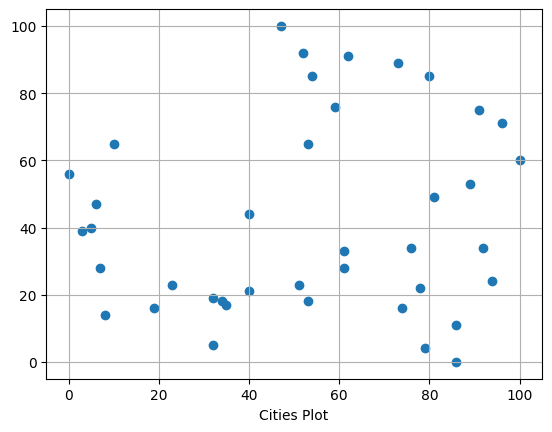

In [31]:
from builtins import print

class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"
    

def readCitiesCSV(fileName: str):
    cities = []
    with open("./" + fileName, "r") as f:
        csv_reader = csv.DictReader(f)
        for row in csv_reader:
            cities.append(City(int(row["X"]), int(row["Y"])))
    return cities



cities = readCitiesCSV("cities40.txt")

x_coordinates = list(map(lambda x: x.x, cities))
y_coordinates = list(map(lambda x: x.y, cities))

plt.scatter(x_coordinates, y_coordinates)
plt.xlabel("X axis")
plt.xlabel("Y axis")
plt.xlabel("Cities Plot")
plt.grid(True)
plt.show()

### Fitness

The Fitness class, which represents the fitness function, possesses the properties of a path and has functions/methods used for calculating the fitness value of the path, which is based on the distance of the path. 

In [32]:
# Route = list of cities
class Fitness:
    def __init__(self, route: list[City]):
        self.route = route
        self.distance = None
        self.fitness = None
    
    def routeDistance(self):
        if self.distance == None:
            pathDistance = 0.0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i+1 < len(self.route):
                    toCity = self.route[i+1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == None:
            if self.routeDistance() == 0:
                self.fitness = math.inf
                return self.fitness
        # Fitness function (Simple division) that uses a simple 
        # division that divides one by the distance of the path
            self.fitness = 1 / float(self.routeDistance())
            # Note: You must ensure a division by zero does not occur 
        return self.fitness


## Population Initialization  

The population initialization function (or method) performs random initialization. This creates an initial population with completely random chromosomes (or solutions). There are three functions related to population initialization. 

The first function is genCityList() which generates a set of cities from a file.  

In [33]:
def genCityList(filename):
    cityList = []
    
    # TODO 1 (10 marks) - Replace the following codes that generate 10 random cities.
    # Your new implementation must read a set of cities from the filename to be used for creating 
    # an initial population.  
    
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation.
    # 5 to <7 marks:  Minor errors with slight effects on the fitness value.
    # >0 to <5 marks: Major errors with significant effects on the fitness value. 
    # 0 marks:        No answer is given. 

    

    
    # == Replacement starts here
    NUM_RANDOM_CITIES = 10
    cities = []
    
    # Read cities from txt file 
    with open("./" + filename, "r") as f:
        csv_reader = csv.DictReader(f)
        for row in csv_reader:
            cities.append(City(int(row["X"]), int(row["Y"])))

    # Randomly select cities 
    cityList = random.sample(cities, NUM_RANDOM_CITIES)
    # == Replacement ends here
    
    return cityList

The second function is createRoute() which generates a random route (chromosome) from a set of City instances.

In [34]:
def createRoute(cityList):
    # Shuffling the array 
    route = random.sample(cityList, len(cityList))
    return route

The third function is initialPopulation() which calls the second function repeatedly to create an initial population (a list of routes).

In [35]:
def initialPopulation(popSize, cityList):
    population = []
    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

You can run the above functions using the sample runs below. To do so, simply change the cell type from Markdown to Code.

Sample run 1 initializes 10 cities in cityList as follows:

cityList = genCityList('cities40.txt') 
print(cityList)

Sample run 2 initializes 10 cities in cityList and creates a population with three routes as follows:

cityList = genCityList('cities40.txt') 
population = initialPopulation(3, cityList) 
print(population)

## Selection

Parents selection selects chromosomes with high fitness values from a population. Survivor selection selects chromosomes with higher fitness values to form the population of the next generation. The population size is len(population), so we have len(population) in this population. 

### Parent Selection

There are three implementations for parent selection. The first parentSelection() performs random selection.

In [36]:
def parentRandomSelection(population, poolSize=None):
    if poolSize == None:
        poolSize = len(population)
        
    matingPool = []
    
    for i in range(0, poolSize):
        fitness = Fitness(population[i]).routeFitness()
        matingPool.append(random.choice(population))
      
    return matingPool

The second parentSelection() performs Tournament Selection.

In [37]:
def parentTournamentSelection(population, poolSize=None):
    # TODO 2 (10 marks) - Replace the dummy parent selection function below with  
    # Tournament Selection.
      
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
    
    # You will need to compare the performance achieved by Random Selection, 
    # Tournament Selection, and Proportional Selection during performance evaluation 
    # later. So, you will run either Random Selection, Tournament Selection, or 
    # Proportional Selection in a simulation run.
    
    if poolSize == None:
        poolSize = len(population)
        
    matingPool = []
    
    # Replacement starts here
    k = 3
     
    for i in range(0 , poolSize):
        # Select k random chromosome from population 
        kChoices = random.sample(population, k)

        # Find the best fit chromosome among k chromosome
        highestFit = kChoices[0]
        for choice in kChoices:
            if Fitness(choice).routeFitness() > Fitness(highestFit).routeFitness():
                highestFit = choice
        
        matingPool.append(highestFit)
    # Replacement ends here
    
    return matingPool
    

The third parentSelection() performs Proportional Selection.

In [38]:
def parentProportionalSelection(population, poolSize=None):
    
    # TODO 3 (10 marks) - Replace the dummy parent selection function below with  
    # Proportional Selection.
      
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
    
    # You will need to compare the performance achieved by Random Selection, 
    # Tournament Selection, and Proportional Selection during performance evaluation 
    # later. So, you will run either Random Selection, Tournament Selection, or 
    # Proportional Selection in a simulation run.
    
    if poolSize == None:
        poolSize = len(population)
        
    matingPool = []
    
    # Replacement starts here
    weights = [] 
    
    # Get the fitness weights 
    for pop in population:
        weights.append(Fitness(pop).routeFitness())
        
    # Select the poolSize parents based on the roulette wheel
    matingPool = random.choices(population, weights=weights, k=poolSize)
    # Replacement ends here
    
    return matingPool

### Survival Selection

In [39]:
def survivorSelection(population, eliteSize):
    
    # TODO 4 (10 marks) - Replace the dummy survival selection function below with  
    # Merge, Sort & Truncate.
      
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
    
    elites = []
    
    # Replacement starts here

    # Calculate the fitness score for each chromosome
    popWithFitness = []
    for pop in population:
        popWithFitness.append({"pop": pop, "fitness": Fitness(pop).routeFitness() })
    
    # Sort the chromosome by the highest fitness score
    popWithFitness = sorted(popWithFitness, key=lambda pop: pop["fitness"], reverse=True)

    # Select the top eliteSize chromosomes
    for i in range(eliteSize):
        elites.append(popWithFitness[i]["pop"])

    # Replacement ends here
    
    return elites

You can run the above functions using the sample runs below. To do so, simply change the cell type from Markdown to Code. 

Sample run 1 initializes 10 cities in cityList, creates a population with four routes, and creates a pool of parents as follows:

population = initialPopulation(4, genCityList('cities10.txt'))
matingpool = parentSelection(population, 4) 
print('Initial population') 
print(population) 
print('Mating pool') 
print(matingpool)

Sample run 2 initializes 10 cities in cityList, creates a population with four routes, select an elite chromosome as follows:

population = initialPopulation(4, genCityList('cities10.txt'))
elites = survivorSelection(population, 1)
print('Initial population')
print(population)
print('Selected elites')
print(elites)

## Crossover


Crossover selects two parents, crossover the genetic materials of the parents, and produce one or more children. In the Travelling Salesman Problem, each travelling path must be valid. Each path consists all cities in the set, and each path visits each of the cities once only. So, none of the cities are visited more than once. Exchanging parts of two chromosomes tend to produce invalid paths. As an example, Parent 1 is [2 1 0 7 3 5 4 6] and Parent 2 is [6 1 0 5 2 3 4 7]. One point crossover at midpoint generates Child 1 [2 1 0 7 2 3 4 7] and Child 2 [6 1 0 5 3 5 4 6]. Both children are invalid paths.     

In [40]:
from builtins import print
def crossover(parent1: list[City], parent2: list[City]):
    # TODO 5 (10 marks) - Replace the dummy crossover function below with 
    # Partially Mapped Crossover approach.
   
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 


    # Replacement starts here
    total_len = len(parent1)
    crossover1, crossover2 = sorted(random.sample(range(1 , total_len - 1), 2))
    
    child1 = [-1] * total_len
    child1[crossover1: crossover2 + 1] = parent1[crossover1: crossover2 + 1]

    child2 = [-1] * total_len 
    child2[crossover1: crossover2 + 1] = parent2[crossover1: crossover2 + 1]

    def pmx (child, childsParent, otherParent):
        for i in range(0, crossover1):
            city = otherParent[i]
            while city in childsParent[crossover1: crossover2 + 1]:
                city = otherParent[childsParent.index(city)]
            child[i] = city

        for i in range(crossover2 + 1, total_len):
            city = otherParent[i]
            while city in childsParent[crossover1: crossover2 + 1]:
                city = otherParent[childsParent.index(city)]
            child[i] = city

    pmx(child1, parent1, parent2)
    pmx(child2, parent2, parent1)
    
    # Replacement ends here

    return child1, child2

Crossover selects two parents from the mating pool to produce a new generation of the same size.

In [41]:
def breedPopulation(matingpool):
    children = []
    
    # Choosing parents in their order of presence in the mating pool. Choosing parents
    # in a random manner is possible. 
    
    for i in range(1, len(matingpool), 2):
        child1, child2 = crossover(matingpool[i-1], matingpool[i])
        children.append(child1)
        children.append(child2)
    
    return children

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes 2 chromosomes in the population, and performs crossover among the two parents. 

from builtins import print
population = initialPopulation(2, genCityList('cities40.txt'))
parent1, parent2 = population
child1, child2 = crossover(parent1, parent2)
print('Parents')
print(parent1)
print(parent2)
print('Children')
print(child1)
print(child2)

## Mutation

Mutation mutates a single chromosome to get a mutated chromosome so that genetic algorithm can converge to a shorter path quickly. In the Travelling Salesman Problem, a mutated chromosome must be a valid path. As an example, the insertion mutation randomly inserts a single gene in the [1 2 3 4 5 6 7 8 9 10] chromosome to generate the [1 2 4 5 6 7 3 8 9 10] mutated chromosome. Step 1: select a gene randomly, Step 2: insert this gene into a randomly selected location.

In [42]:
def mutate(route: list[City], mutationProbability):
    
    # TODO 6 (10 marks) - Replace the dummy mutation function below with Insertion Mutation.
    # The dummy mutation function simply swaps a city with the city before it.  
   
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
     
    mutated_route = route[:]
    for i in range(len(mutated_route)):
        if (random.random() < mutationProbability):
            # mutationProbability is the probability of a gene undergoing mutation
            
            # Replacement starts here
            # Get a random index from the route array 
            idx = random.randint(0 , len(mutated_route) - 1)
            # Remove the selected 
            item = mutated_route.pop(idx)

            # Insert  
            idx2 = random.randint(0 , len(mutated_route) - 1)
            mutated_route.insert(idx2 , item)
            # Replacement ends here
    return mutated_route

Mutation runs over the entire population and mutates each chromosome in the population with a small mutationProbability. 

In [43]:
def mutation(population, mutationProbability):
    mutatedPopulation = []
    for i in range(0, len(population)):
        mutatedIndividual = mutate(population[i], mutationProbability)
        mutatedPopulation.append(mutatedIndividual)
    return mutatedPopulation

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes a route comprised of 10 cities in cityList, and then mutates it as follows:

route = genCityList('cities10.txt')
mutated = mutate(route, 1)  # Give a pretty high chance for mutation
print('Original route')
print(route)
print('Mutated route')
print(mutated)

## Running One Generation (or Iteration)

Here, we run one generation of genetic algorithm. 

In [44]:
def oneGeneration(population, eliteSize, mutationProbability, parentSelection):
    
    # First we preserve the elites
    elites = survivorSelection(population, eliteSize)
    
    # Then we calculate what our mating pool size should be and generate
    # the mating pool
    poolSize = len(population) - eliteSize
    matingpool = parentSelection(population, poolSize)
        
    # Then we perform crossover on the mating pool
    children = breedPopulation(matingpool)
    
    # We combine the elites and children into one population
    new_population = elites + children
    
    # We mutate the population
    mutated_population = mutation(new_population, mutationProbability)
        
    return mutated_population

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes a population comprised of 5 chromosomes based on 10 cities in cityList, and then run one generation (or iteration) of genetic algorithm as follows:

population = initialPopulation(5, genCityList('cities10.txt'))
eliteSize = 1
mutationProbability = 0.01
new_population = oneGeneration(population, eliteSize, mutationProbability)
print('Initial population')
print(population)
print('New population')
print(new_population)

## Running Many Generations (or Iterations) 

RUNNING PARAMS {'algo': 'random', 'iterationLimit': 100, 'popSize': 50}
BEST DISTANCE for {'algo': 'random', 'iterationLimit': 100, 'popSize': 50} :  256.35353716577947 

RUNNING PARAMS {'algo': 'proportional', 'iterationLimit': 100, 'popSize': 50}
BEST DISTANCE for {'algo': 'proportional', 'iterationLimit': 100, 'popSize': 50} :  261.29607644888597 

RUNNING PARAMS {'algo': 'tournament', 'iterationLimit': 100, 'popSize': 50}
BEST DISTANCE for {'algo': 'tournament', 'iterationLimit': 100, 'popSize': 50} :  256.35353716577947 



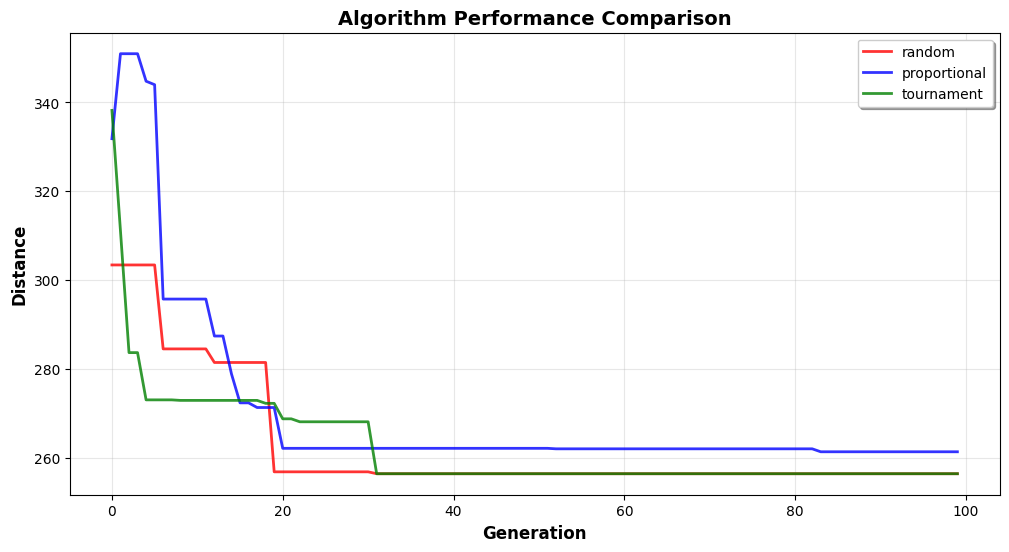

RUNNING PARAMS {'algo': 'random', 'iterationLimit': 200, 'popSize': 50}
BEST DISTANCE for {'algo': 'random', 'iterationLimit': 200, 'popSize': 50} :  256.35353716577947 

RUNNING PARAMS {'algo': 'proportional', 'iterationLimit': 200, 'popSize': 50}
BEST DISTANCE for {'algo': 'proportional', 'iterationLimit': 200, 'popSize': 50} :  256.35353716577947 

RUNNING PARAMS {'algo': 'tournament', 'iterationLimit': 200, 'popSize': 50}
BEST DISTANCE for {'algo': 'tournament', 'iterationLimit': 200, 'popSize': 50} :  256.3535371657795 



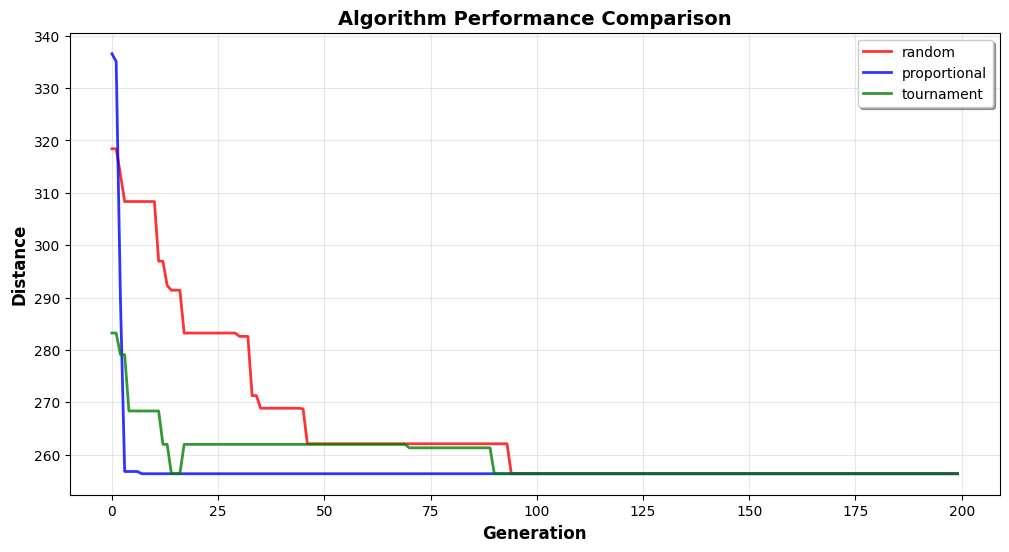

RUNNING PARAMS {'algo': 'random', 'iterationLimit': 300, 'popSize': 50}
BEST DISTANCE for {'algo': 'random', 'iterationLimit': 300, 'popSize': 50} :  256.35353716577947 

RUNNING PARAMS {'algo': 'proportional', 'iterationLimit': 300, 'popSize': 50}
BEST DISTANCE for {'algo': 'proportional', 'iterationLimit': 300, 'popSize': 50} :  256.35353716577947 

RUNNING PARAMS {'algo': 'tournament', 'iterationLimit': 300, 'popSize': 50}
BEST DISTANCE for {'algo': 'tournament', 'iterationLimit': 300, 'popSize': 50} :  256.35353716577947 



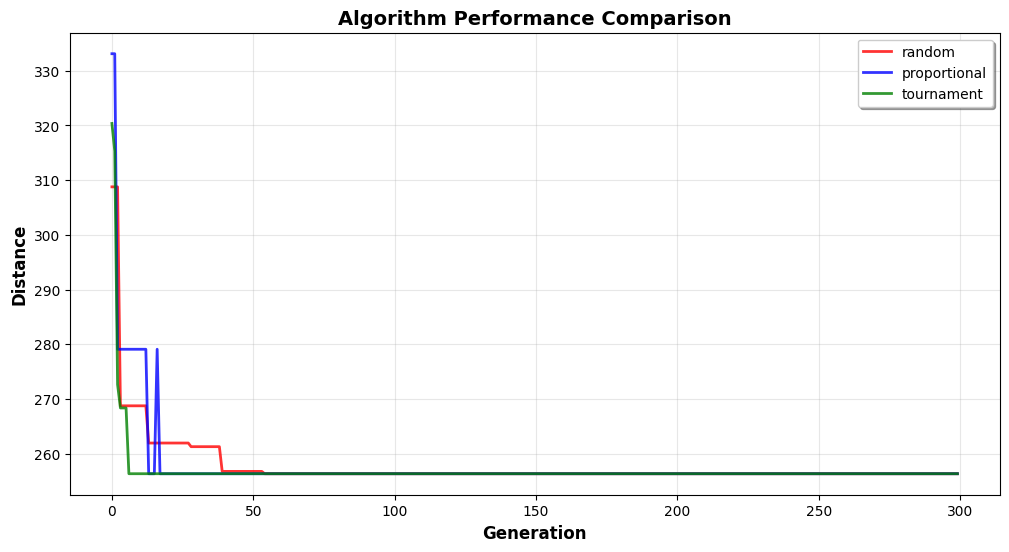

RUNNING PARAMS {'algo': 'random', 'iterationLimit': 400, 'popSize': 50}
BEST DISTANCE for {'algo': 'random', 'iterationLimit': 400, 'popSize': 50} :  256.35353716577947 

RUNNING PARAMS {'algo': 'proportional', 'iterationLimit': 400, 'popSize': 50}
BEST DISTANCE for {'algo': 'proportional', 'iterationLimit': 400, 'popSize': 50} :  256.3535371657795 

RUNNING PARAMS {'algo': 'tournament', 'iterationLimit': 400, 'popSize': 50}
BEST DISTANCE for {'algo': 'tournament', 'iterationLimit': 400, 'popSize': 50} :  256.3535371657795 



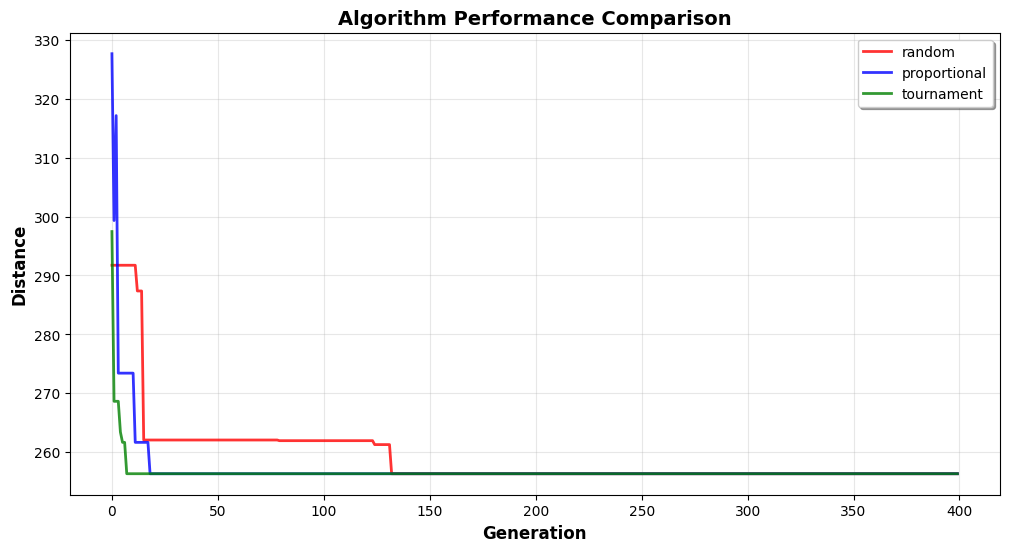

[{'param': {'algo': 'random', 'iterationLimit': 100, 'popSize': 50}, 'dist': np.float64(256.35353716577947)}, {'param': {'algo': 'proportional', 'iterationLimit': 100, 'popSize': 50}, 'dist': np.float64(261.29607644888597)}, {'param': {'algo': 'tournament', 'iterationLimit': 100, 'popSize': 50}, 'dist': np.float64(256.35353716577947)}, {'param': {'algo': 'random', 'iterationLimit': 200, 'popSize': 50}, 'dist': np.float64(256.35353716577947)}, {'param': {'algo': 'proportional', 'iterationLimit': 200, 'popSize': 50}, 'dist': np.float64(256.35353716577947)}, {'param': {'algo': 'tournament', 'iterationLimit': 200, 'popSize': 50}, 'dist': np.float64(256.3535371657795)}, {'param': {'algo': 'random', 'iterationLimit': 300, 'popSize': 50}, 'dist': np.float64(256.35353716577947)}, {'param': {'algo': 'proportional', 'iterationLimit': 300, 'popSize': 50}, 'dist': np.float64(256.35353716577947)}, {'param': {'algo': 'tournament', 'iterationLimit': 300, 'popSize': 50}, 'dist': np.float64(256.3535371

In [45]:
filename = 'cities400.txt'
popSize = 50
eliteSize = 5
mutationProbability = 0.01
iteration_limit = 250 

iteration_limit_map = []
for i in range(100, 500, 100):
    iteration_limit_map.append(i)


# Algorithm , number of cities, 

# TODO 7 (10 marks) - Performance Evaluation. You will present the performance achieved 
# by different parent selection function. You will compare the 
# performance achieved by Random Selection, Tournament Selection, and Proportional Selection. 

# Marking scheme: 
# 7 to 10 marks:  In-depth performance evaluation. Optimal routes are found. 
# 5 to <7 marks:  Clear understanding of performance evaluation.
# >0 to <5 marks: Inaccurate or unclear understanding of performance evaluation. 
# 0 marks:        No answer is given. 
mapOfAlgos = {
    "random": parentRandomSelection,
    "proportional": parentProportionalSelection,
    "tournament": parentTournamentSelection,
}

results = []

# Map the algorithms to the iteration limits and population size
params = []
for it in iteration_limit_map:
    for key in mapOfAlgos:
        params.append({
            "algo": key,
            "iterationLimit": it,
            "popSize": popSize,
        })

def evaluatePerformance(cityList: list[City], params):
    print("RUNNING PARAMS", params)
    parentSelection = mapOfAlgos[params["algo"]]
    population = initialPopulation(params["popSize"], cityList)
    distances = [Fitness(p).routeDistance() for p in population]
    min_dist = min(distances)

    # print("Best distance for initial population: " + str(min_dist))

    for i in range(params["iterationLimit"]):
        population = oneGeneration(population, eliteSize, mutationProbability, parentSelection)
        distances = [Fitness(p).routeDistance() for p in population]
        index = np.argmin(distances)
        best_route = population[index]
        min_dist = min(distances)

        results.append({
            "iteration": i,
            "distances": distances,
            "algo": params["algo"],
        })

    # print("Optimal path is " + str(best_route))
    print(f"BEST DISTANCE for {params} : ", min_dist, "\n" )
    return min_dist

def generateScatterChart(result, algo = mapOfAlgos):
    # Change tuple to list
    algo_names = list(algo.keys())

    colors = ['red', 'blue', 'green']

    plt.figure(figsize=(12, 6))
    
    for i, algo_name in enumerate(algo_names[:3]):  # Limit to 3 algorithms
        # Filter results for this specific algorithm
        algo_results = [r for r in result if r.get("algo") == algo_name]
        
        if algo_results:  # Only plot if we have data for this algorithm
            iteration_data = [gen["iteration"] for gen in algo_results]
            distances_data = [min(gen["distances"]) for gen in algo_results]
            
            plt.plot(iteration_data, distances_data,
                    color=colors[i],
                    alpha=0.8,
                    label=f'{algo_name}',
                    linewidth=2)
    
    plt.xlabel('Generation', fontsize=12, fontweight='bold')
    plt.ylabel('Distance', fontsize=12, fontweight='bold')
    plt.title('Algorithm Performance Comparison', fontsize=14, fontweight='bold')
    plt.legend(loc='best', frameon=True, fancybox=True, shadow=True)
    plt.grid(True, alpha=0.3)
    plt.show()


cityList = genCityList(filename)
iteration = []

for i, param in enumerate(params): 
    min_dist = evaluatePerformance(cityList, param)
    iteration.append({"param": param, "dist": min_dist})

    # Only plot the graph when the 3 algo for a iteration limit are ran
    if (i+1) % 3 == 0:
        generateScatterChart(results, mapOfAlgos)

        # Clear results for the next iteration limit
        results.clear()

print(iteration)
